# Introduction
매매횟수가 많을수록 손실을 보는 건 경험으로 알고 있다.  
실제 통계로도 그럴까?   
유튜브: https://youtu.be/8t5AUCrfbF0

# Import

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

# Load

In [2]:
df = pd.read_csv('data.csv')
df.head()

,주문일자,체결시간,종목명,매수가,수익률,매매기법,종목코드,매수등락률,고가등락률,시가등락률,뉴스기사
0,2022-03-29,09:09:07,고려시멘트,5230,2.87,NaN,198440,16.22,24.44,6.22,1
1,2022-03-29,09:28:09,고려시멘트,5410,1.85,NaN,198440,20.22,24.44,6.22,1
2,2022-03-29,10:38:18,고려시멘트,5441,0.15,NaN,198440,20.91,24.44,6.22,1
3,2022-03-29,09:51:11,영진약품,5490,0.66,NaN,3520,6.60,10.10,0.19,1
4,2022-03-29,09:58:16,버킷스튜디오,5060,-0.59,NaN,66410,11.58,18.85,3.09,1


# COUNT

In [3]:
def count(df):
    list = []
    dates = df['주문일자'].unique()
    for date in dates:
        frame = df[df['주문일자'] == date]
        length = len(frame)
        mean = round(frame['수익률'].mean(),2)
        median = round(frame['수익률'].median(),2)
        list.append([length, mean, median])
        
    dataframe = pd.DataFrame(list, columns=['count','mean','median'])
    
    return dataframe

In [4]:
df = count(df)
df = df.sort_values('count', ascending=True)
df = df.set_index('count')
df

,mean,median
count,,
1,4.95,4.95
5,0.55,0.37
5,0.86,0.92
12,0.82,0.00
13,0.24,0.16
13,-0.90,-1.39
15,1.57,0.15
18,-0.22,-0.16
22,-0.84,-1.00


# Visualization
매매횟수와 수익률은 반비례 관계가 있다.

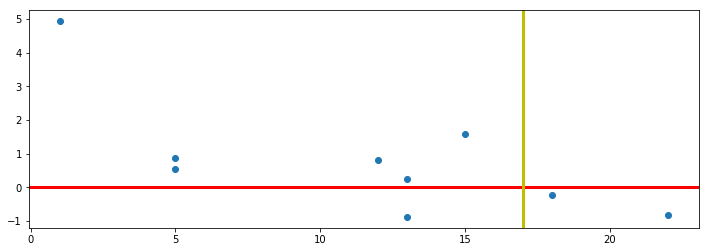

In [20]:
plt.scatter(df.index, df['mean'])
plt.axhline(y=0, color='r', linewidth=3)
plt.axvline(x=17, color='y', linewidth=3)
plt.rcParams["figure.figsize"] = (12, 4)
plt.show()

# Conclusion
매매횟수는 17회로 제한한다.